In [1]:
using Cropbox 

WebIO._IJuliaInit()

In [2]:
using Pkg
Pkg.activate("/Users/sunwoo/Desktop/stats_modeling/Poplar.jl-master")

  Activating project at `~/Desktop/stats_modeling/Poplar.jl-master`


In [3]:
Pkg.update();

    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/stats_modeling/Poplar.jl-master/Project.toml`
  No Changes to `~/Desktop/stats_modeling/Poplar.jl-master/Manifest.toml`
Precompiling project...
        Info Given Poplar was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Poplar


In [4]:
using BlackBoxOptim

In [5]:
using Poplar

Precompiling Poplar
        Info Given Poplar was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Poplar
[ Info: Precompiling Poplar [2ac1d81f-ab57-47cd-aabe-dd331b9c4e21]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Poplar [2ac1d81f-ab57-47cd-aabe-dd331b9c4e21].
┌ Warning: Replacing docs for `Poplar.Soil :: Union{}` in module `Poplar`
└ @ Base.Docs docs/Docs.jl:243


## Model

The 3PG model is using NPP as the proportion of GPP but, to implement respiration, the defintion is newly defined: NPP = GPP - each organ's respiration

@system MaintenanceRespiration(Poplar.Weather, Poplar.Foliage, Poplar.Root, Poplar.Stem, Controller)begin
        
    Q10: temperature_sensitivity_conefficient => 2.0 ~ preserve(parameter) #dimensionless
    k_root: root_maintenance_coefficient => 0.03 ~ preserve(parameter, u"g/g/d"#=gCO2 25oC=#)

    Root_Rp(k_root, Q10, WR, T_air): root_maintenance_respiration => begin
        k_root * WR * Q10^((T_air-25) / 10)
    end ~ track(u"hr^-1")
       
end 

In [100]:
respiration_coeff_config = @config(
    Poplar.Root => (
        k_root_CO2 = 0.0005,
    ),
    Poplar.Stem => (
        k_stem_CO2 = 0.0005,
    ),
    Poplar.Foliage => (
        k_leaf_CO2 = 0.001,
    ),
    Poplar.config_Calendar,
    Poplar.config_Atmosphere,
)

k_root_CO2,=,0.0005 d⁻¹
k_stem_CO2,=,0.0005 d⁻¹
k_leaf_CO2,=,0.001 d⁻¹
init,=,"ZonedDateTime(2014, 4, 5, tz""America/Los_Angeles"")"
last,=,"ZonedDateTime(2021, 12, 31, tz""America/Los_Angeles"")"
data,=,70128×9 DataFrame…


In [116]:
NI = simulate(Model;
    config = respiration_coeff_config,
    stop = 1u"yr",
    snap = 6u"hr"
);

Progress: 100%[===========================] Time: 0:00:04 ( 0.47 ms/it)


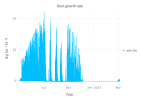

In [118]:
Cropbox.plot(NI, :time, [:dWR];
    title="Root growth rate",
    names=["with_Rp"],
    xlab="Year",
    ylab="",
    kind=:line,
)

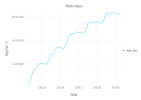

In [115]:
Cropbox.plot(NI, :time, [:WR];
    title="Root mass",
    names=["with_Rp"],
    xlab="Year",
    ylab="",
    kind=:line,
)

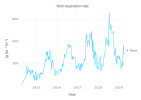

In [104]:
Cropbox.plot(NI, :time, [:Root_Rp];
    title="Root respiration rate",
    names=["Root"],
    xlab="Year",
    ylab="",
    kind=:line,
)

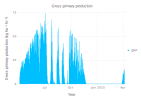

In [120]:
Cropbox.plot(NI, :time, [:GPP];
    title="Gross primary production",
    names=["GPP"],
    xlab="Year",
    ylab="Gross primary production",
    kind=:line,
)

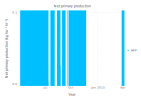

In [119]:
Cropbox.plot(NI, :time, [:NPP];
    title="Net primary production",
    names=["NPP"],
    xlab="Year",
    ylab="Net primary production",
    kind=:line,
    ylim = [0,0.1]
)

In [105]:
NI.Root_Rp

183-element Vector{Unitful.Quantity{Float64, 𝐌 𝐋⁻² 𝐓⁻¹, Unitful.FreeUnits{(ha⁻¹, g, hr⁻¹), 𝐌 𝐋⁻² 𝐓⁻¹, nothing}}}:
 13.867424147053107 g ha⁻¹ hr⁻¹
 16.859866020314357 g ha⁻¹ hr⁻¹
  18.01209539215467 g ha⁻¹ hr⁻¹
 26.465734086286275 g ha⁻¹ hr⁻¹
   46.3210561070496 g ha⁻¹ hr⁻¹
  49.39843935449549 g ha⁻¹ hr⁻¹
  59.48015416885639 g ha⁻¹ hr⁻¹
  65.57665312131144 g ha⁻¹ hr⁻¹
  83.30392106557632 g ha⁻¹ hr⁻¹
  84.62555814689887 g ha⁻¹ hr⁻¹
 176.40901683704274 g ha⁻¹ hr⁻¹
 102.60408241644132 g ha⁻¹ hr⁻¹
 135.70983825569084 g ha⁻¹ hr⁻¹
                              ⋮
 243.05180228240988 g ha⁻¹ hr⁻¹
  271.1199108974262 g ha⁻¹ hr⁻¹
 254.31178224590136 g ha⁻¹ hr⁻¹
 235.26154779416152 g ha⁻¹ hr⁻¹
  267.9442348444613 g ha⁻¹ hr⁻¹
  199.9445573985846 g ha⁻¹ hr⁻¹
  151.2665851207139 g ha⁻¹ hr⁻¹
 160.71567296562984 g ha⁻¹ hr⁻¹
 203.06307503010729 g ha⁻¹ hr⁻¹
 169.29849219527145 g ha⁻¹ hr⁻¹
  367.3706471832241 g ha⁻¹ hr⁻¹
 274.13824184319753 g ha⁻¹ hr⁻¹

In [106]:
NI.Stem_Rp

183-element Vector{Unitful.Quantity{Float64, 𝐌 𝐋⁻² 𝐓⁻¹, Unitful.FreeUnits{(ha⁻¹, g, hr⁻¹), 𝐌 𝐋⁻² 𝐓⁻¹, nothing}}}:
 18.489898862737473 g ha⁻¹ hr⁻¹
 22.748297748933552 g ha⁻¹ hr⁻¹
 25.309148831568898 g ha⁻¹ hr⁻¹
  38.57281829357985 g ha⁻¹ hr⁻¹
  69.42917532066171 g ha⁻¹ hr⁻¹
  75.63820432298515 g ha⁻¹ hr⁻¹
  92.58828570327987 g ha⁻¹ hr⁻¹
 103.31496411847701 g ha⁻¹ hr⁻¹
 132.42030070246906 g ha⁻¹ hr⁻¹
 135.55475960139324 g ha⁻¹ hr⁻¹
 283.73246180950855 g ha⁻¹ hr⁻¹
 165.33468239558505 g ha⁻¹ hr⁻¹
  219.4135571886759 g ha⁻¹ hr⁻¹
                              ⋮
  477.4600866706261 g ha⁻¹ hr⁻¹
   533.460013779938 g ha⁻¹ hr⁻¹
   501.197818742272 g ha⁻¹ hr⁻¹
   464.403915492083 g ha⁻¹ hr⁻¹
  529.7751363005941 g ha⁻¹ hr⁻¹
 395.96698222220755 g ha⁻¹ hr⁻¹
 300.08685737266416 g ha⁻¹ hr⁻¹
   319.403503133598 g ha⁻¹ hr⁻¹
  404.2870902285586 g ha⁻¹ hr⁻¹
  337.6152650307165 g ha⁻¹ hr⁻¹
  733.7965572597086 g ha⁻¹ hr⁻¹
    548.45761613529 g ha⁻¹ hr⁻¹

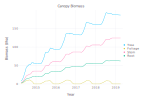

In [107]:
Cropbox.plot(NI, :time, [:W_ton, :WF_ton, :WS_ton, :WR_ton];
    title="Canopy Biomass",
    names=["Tree", "Foliage", "Stem", "Root"],
    xlab="Year",
    ylab="Biomass (t/ha)",
    kind=:line,
)

In [109]:
EI = simulate(Poplar.Model;
    config = @config(
        respiration_coeff_config,
        Poplar.config_GasExchange_EI
    ),
    stop = 5u"yr",
    snap = 10u"d"
);

Progress: 100%[===========================] Time: 0:00:15 ( 0.35 ms/it)


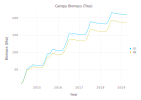

In [113]:
p = Cropbox.plot(EI, :time, :W_ton;
    title="Canopy Biomass (Tree)",
    names=["EI"],
    xlab="Year",
    ylab="Biomass (t/ha)",
    kind=:line,
)

Cropbox.plot!(p, NI, :time, :W_ton;
    names=["NI"],
    kind=:line
)

In [111]:
@look Poplar.Root

[doc]

[system]
Root
  context
  config
  iWR
  gammaR
  growthRoot
  deathRoot
  gammaRhour
  rootTurnover
  dWR
  WR
  WR_ton
  Q10 (temperature_sensitivity_conefficient)
  k_root_CO2 (root_maintenance_coefficient_CO2)
  k_root
  Root_Rp (root_maintenance_respiration)